# Versuch 3 - Code 

In [6]:
import numpy as np 
import matplotlib.pyplot as plt

1. Bestimmung der Tonhöhe eines akustischen Signals 

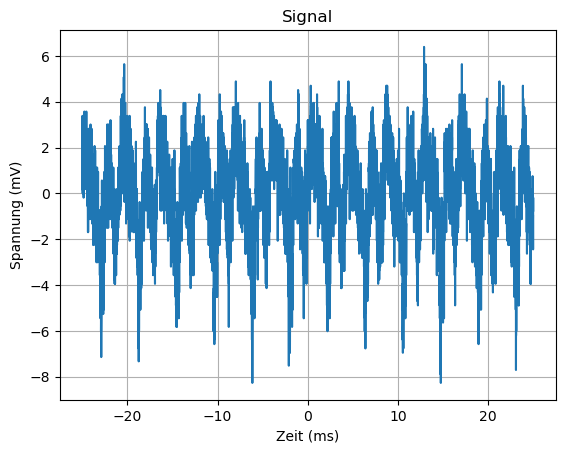

In [44]:
file_path = "aufgabe1_3.csv"
#csv Datei einlesen
#wichtig: erste Spalte enthält Zeitwerte in ms, zweite Spalte gemessene Spannung in mV 
data = np.genfromtxt(file_path, delimiter=';',skip_header=3, usecols=(0,1), converters={0: lambda s: float(s.decode('utf-8').replace(',', '.')), 1: lambda s: float(s.decode('utf-8').replace(',', '.'))})

zeit = data[:,0]
spannung = data[:,1]

plt.plot(zeit, spannung)
plt.xlabel('Zeit (ms)')
plt.ylabel('Spannung (mV)')
plt.title('Signal')
plt.grid(True)
plt.show()

2. Frequenzgang von Lautsprechern 

*Anmerkung: alles was als aufgabe3_\* abgespeichert wurde, sind .csv Daten zum kleinen Lautsprecher*